In [5]:
import pandas as  pd
df=pd.read_csv("Tweets.csv")

In [6]:
df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence   
0      570306133677760513           neutral                        1.0000  \
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [7]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:

dfn=df[['text','airline_sentiment']]
print(dfn.shape)

(14640, 2)


In [39]:
#remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JeeKay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [12]:
#removing url and special characters
import re

def remove_urls_special_characters(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation except for apostrophes
    text = re.sub(r'[^a-zA-Z0-9\']+', ' ', text)
    return text


In [13]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]>

In [14]:
dfn=dfn[dfn['airline_sentiment']!='neutral']
print(dfn.shape)

(11541, 2)


In [15]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
1      @VirginAmerica plus you've added commercials t...          positive
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
5      @VirginAmerica seriously would pay $30 a fligh...          negative
6      @VirginAmerica yes, nearly every time I fly VX...          positive
...                                                  ...               ...
14633  @AmericanAir my flight was Cancelled Flightled...          negative
14634         @AmericanAir right on cue with the delays👌          negative
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14638  @AmericanAir you have my money, you change my ...          negative

[11541 rows x 2 columns]>

In [16]:
dfn["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [17]:
labels=dfn.airline_sentiment.factorize()

In [18]:
labels

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [19]:
tweet=dfn.text.values

In [20]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [21]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [24]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [26]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

C:\Users\JeeKay\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [28]:
print(pipe("hello there!!"))

[{'label': 'POSITIVE', 'score': 0.9979816675186157}]


In [29]:
print(pipe("Very bad!!"))

[{'label': 'NEGATIVE', 'score': 0.9994588494300842}]


In [30]:
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint

In [31]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels[0], test_size=0.2, random_state=42)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense


In [33]:
#Build CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=64))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

In [34]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.7715 - loss: 0.5071 - val_accuracy: 0.9108 - val_loss: 0.2488
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9256 - loss: 0.1832 - val_accuracy: 0.9164 - val_loss: 0.2230
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9677 - loss: 0.0899 - val_accuracy: 0.9207 - val_loss: 0.2372
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9877 - loss: 0.0463 - val_accuracy: 0.9212 - val_loss: 0.2853
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9939 - loss: 0.0236 - val_accuracy: 0.9190 - val_loss: 0.3298
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9982 - loss: 0.0104 - val_accuracy: 0.9181 - val_loss: 0.3738
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9991 - loss: 0.0050 - val_accuracy: 0.9207 - val_loss: 0.4134
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accu

In [36]:
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Test Accuracy:", cnn_scores[1])

CNN Test Accuracy: 0.9198787212371826


In [37]:
# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

In [38]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


145/145 ━━━━━━━━━━━━━━━━━━━━ 50s 295ms/step - accuracy: 0.8034 - loss: 0.4842 - val_accuracy: 0.9147 - val_loss: 0.2335
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 0.9412 - loss: 0.1565 - val_accuracy: 0.9285 - val_loss: 0.2092
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - accuracy: 0.9669 - loss: 0.1008 - val_accuracy: 0.9251 - val_loss: 0.2439
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - accuracy: 0.9776 - loss: 0.0670 - val_accuracy: 0.9190 - val_loss: 0.2808
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 46s 314ms/step - accuracy: 0.9827 - loss: 0.0476 - val_accuracy: 0.9251 - val_loss: 0.2991
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 312ms/step - accuracy: 0.9902 - loss: 0.0375 - val_accuracy: 0.9207 - val_loss: 0.3382
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9233 - val_loss: 0.3438
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 35s 241ms/step - accuracy: 0.9920 - loss: 0.0271 - val

In [43]:
lstm_scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("LSTM Test Accuracy:", lstm_scores[1])

LSTM Test Accuracy: 0.9159809350967407


In [44]:
from tensorflow.keras.layers import Bidirectional


In [45]:
# Build BiLSTM Model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=64))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(GlobalMaxPooling1D())
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

In [46]:
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


145/145 ━━━━━━━━━━━━━━━━━━━━ 53s 316ms/step - accuracy: 0.8101 - loss: 0.4837 - val_accuracy: 0.9181 - val_loss: 0.2323
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 49s 337ms/step - accuracy: 0.9439 - loss: 0.1566 - val_accuracy: 0.9212 - val_loss: 0.2217
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 46s 319ms/step - accuracy: 0.9640 - loss: 0.0988 - val_accuracy: 0.9181 - val_loss: 0.2606
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 46s 315ms/step - accuracy: 0.9779 - loss: 0.0693 - val_accuracy: 0.9160 - val_loss: 0.2971
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 48s 332ms/step - accuracy: 0.9813 - loss: 0.0537 - val_accuracy: 0.9238 - val_loss: 0.3521
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 50s 344ms/step - accuracy: 0.9877 - loss: 0.0406 - val_accuracy: 0.9181 - val_loss: 0.3493
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 45s 307ms/step - accuracy: 0.9935 - loss: 0.0246 - val_accuracy: 0.9177 - val_loss: 0.3515
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 48s 330ms/step - accuracy: 0.9940 - loss: 0.0200 - val

In [48]:
bilstm_scores = bilstm_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM Test Accuracy:", bilstm_scores[1])

BiLSTM Test Accuracy: 0.9172801971435547


In [49]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

In [50]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [51]:
bilstm_attention_model = Sequential()
bilstm_attention_model.add(Embedding(input_dim=5000, output_dim=64))
bilstm_attention_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_attention_model.add(AttentionLayer())
bilstm_attention_model.add(Dense(64, activation='relu'))
bilstm_attention_model.add(Dense(1, activation='sigmoid'))

In [52]:
bilstm_attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
bilstm_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


145/145 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - accuracy: 0.7762 - loss: 0.5281 - val_accuracy: 0.8064 - val_loss: 0.4996
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.7981 - loss: 0.4948 - val_accuracy: 0.8086 - val_loss: 0.3594
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.8154 - loss: 0.3486 - val_accuracy: 0.8181 - val_loss: 0.3112
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 0.8447 - loss: 0.2966 - val_accuracy: 0.8523 - val_loss: 0.3399
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.8613 - loss: 0.3191 - val_accuracy: 0.9168 - val_loss: 0.2399
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.9417 - loss: 0.1505 - val_accuracy: 0.9242 - val_loss: 0.2157
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 42s 263ms/step - accuracy: 0.9607 - loss: 0.1109 - val_accuracy: 0.9277 - val_loss: 0.2354
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 0.9752 - loss: 0.0709 - val

In [54]:
# Evaluate BiLSTM Model with Attention
bilstm_attention_scores = bilstm_attention_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM with Attention Test Accuracy:", bilstm_attention_scores[1])

BiLSTM with Attention Test Accuracy: 0.9190125465393066


In [55]:
# Assuming you have trained your CNN model like this:
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# And your BiLSTM model like this:
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9190 - val_loss: 0.4437
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9181 - val_loss: 0.4738
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9177 - val_loss: 0.4655
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 0.9125 - val_loss: 0.4837
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9995 - loss: 0.0047 - val_accuracy: 0.9168 - val_loss: 0.4958
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9177 - val_loss: 0.4773
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9996 - loss: 0.0034 - val_accuracy: 0.9155 - val_loss: 0.4791
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accu

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9125 - val_loss: 0.4971
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9181 - val_loss: 0.4986
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9155 - val_loss: 0.5103
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9104 - val_loss: 0.5232
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9160 - val_loss: 0.5459
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9142 - val_loss: 0.5300
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9147 - val_loss: 0.5656
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accu

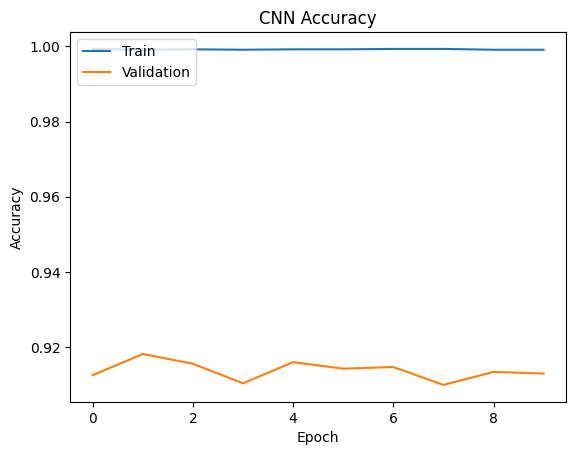

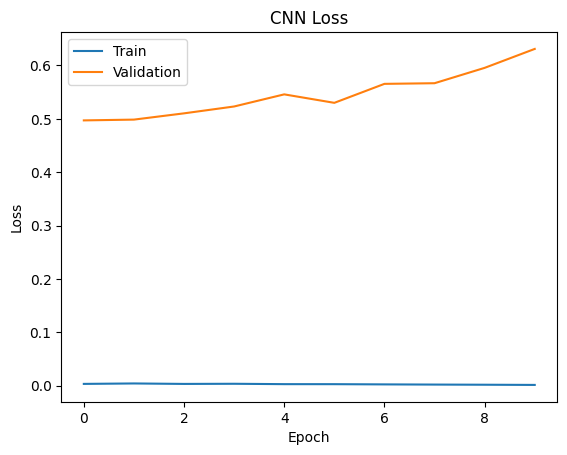

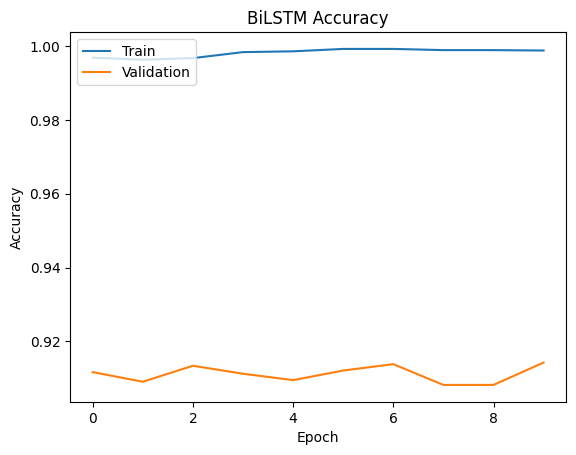

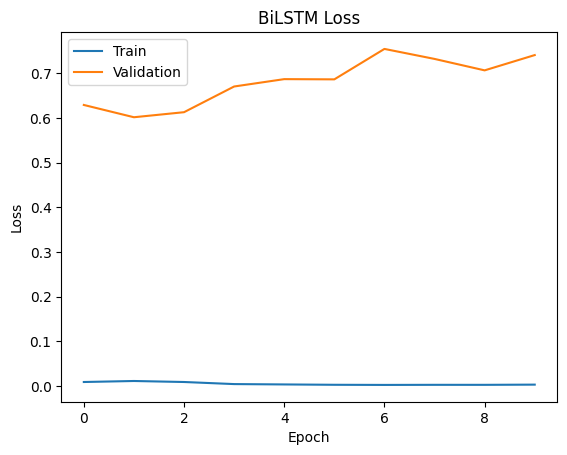

In [56]:
# Define cnn_history and bilstm_history variables
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot the accuracy and loss graphs
plot_graphs(cnn_history, 'CNN')
plot_graphs(bilstm_history, 'BiLSTM')
